# 02_poisson_equation_python

Numerically solves the Poisson equation with the intention of benchmarking Julia against Python.

This script should be run second as it also performs the data analysis, importing the data generated by the Julia notebook.

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 18
from functions import manufacture_source_term,create_poisson_matrix,\
solve_poisson,L2_norm,wrap

In [2]:
def benchmark_poisson(dims,L,tol,direct):
    '''
    Solves the Poisson equation over a range of dimensions in the case of a known solution.
    
    Parameters
    ----------
    dims int: the number of grid points in x and y (square matrix)
    L float: the linear dimension in x and y
    tol float: the relative tolerance for the iterative, CG solver
    direct Boolean: if true, a direct solver is used, if false an iterative CG solver

    Outputs
    ----------
    times array: mean runtimes
    norms array: L2 norms
    us array: the actual numerical solutions
    '''

    # Create empty lists in which to output the data
    norms = []
    times = []
    us = []

    # Compute the solution and error for each grid size.
    for dim in dims:
        q,u_a = manufacture_source_term(dim,dim,L,L)
        A = create_poisson_matrix(dim,dim,L,L)
        a = %timeit -o solve_poisson(dim,dim,A,q,direct,tol)
        n = solve_poisson(dim,dim,A,q,direct,tol)
        u = wrap(dim,dim,n)
        times.append(a.average)
        norm = L2_norm(u_a,u)
        norms.append(norm)
        us.append(u)
        
    return times,norms,us

## Solve the Poisson equation
The dims array defines the range of dimensions to solve the equation for

In [3]:
dims = [11,21,41,81,161,321]
L = 1
tol = 1e-8
times_cg,norms_cg,us_cg = benchmark_poisson(dims,L,tol,False);
times,norms,us = benchmark_poisson(dims,L,tol,True);

90.6 µs ± 13.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
114 µs ± 34.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
122 µs ± 4.65 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
245 µs ± 73.7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
527 µs ± 64.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.73 ms ± 393 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
179 µs ± 17.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1.01 ms ± 90.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
4.52 ms ± 395 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
25.8 ms ± 863 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
156 ms ± 8.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.12 s ± 122 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# The data analysis section
Really this should be in a separate notebook.

## Plotting the analytic and numerical solutions
Only for visual comparison.

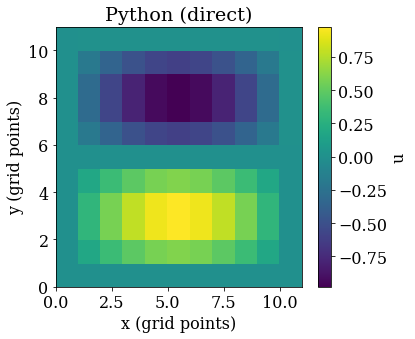

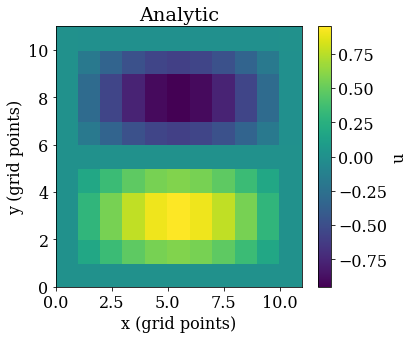

In [6]:
# Generate the analytic solution for plotting
dim = 11
L = 1
q,u_a = manufacture_source_term(dim,dim,L,L)

fig,ax = plt.subplots(1,1,figsize=[6,5])
plot_data = ax.pcolor(us[0].T)#,shading='auto')
cbar = fig.colorbar(plot_data)
ax.set_xlabel('x (grid points)')
ax.set_ylabel('y (grid points)')
cbar.set_label('u')
ax.set_title('Python (direct)')
fig.tight_layout()
fig.savefig('sim.png',dpi=300)

fig,ax = plt.subplots(1,1,figsize=[6,5])
plot_data = ax.pcolor(u_a.T)#,shading='auto')
cbar = fig.colorbar(plot_data)
cbar.set_label('u')
ax.set_xlabel('x (grid points)')
ax.set_ylabel('y (grid points)')
ax.set_title('Analytic')
fig.tight_layout()
fig.savefig('ana.png',dpi=300)

## Importing the Julia data from file

In [ ]:
us_jl = []
for i in range(len(dims)):
    us_jl.append(np.genfromtxt('us_jl_'+str(i)+'.csv', delimiter=','))
    
us_cg_jl = []
for i in range(len(dims)):
    us_cg_jl.append(np.genfromtxt('us_cg_jl_'+str(i)+'.csv', delimiter=','))
    
norms_jl = np.genfromtxt('norms_jl.txt', delimiter=',')
norms_cg_jl = np.genfromtxt('norms_cg_jl.txt', delimiter=',')

times_jl = np.genfromtxt('times_jl.txt', delimiter=',')
times_cg_jl = np.genfromtxt('times_cg_jl.txt', delimiter=',')


## Plotting the mean runtimes

In [ ]:
fig,ax = plt.subplots(1,1,figsize=[6,5])
ax.loglog(dims,times,'.-',color = 'b',linewidth=2,markersize=12,label='Py')
ax.loglog(dims,times_cg,'.-',color = 'c',linewidth=2,markersize=12,label='Py CG')


ax.loglog(dims,np.array(times_jl)/1e9,'.-',color = 'r',linewidth=2,markersize=12,label='Ju')
ax.loglog(dims,np.array(times_cg_jl)/1e9,'.-',color = 'm',linewidth=2,markersize=12,label='Ju CG')

ax.set_xlabel('Linear dimension (points)')
ax.set_ylabel('Time (s)')
fig.legend(frameon=False,loc=[0.2,0.6])
fig.tight_layout()
fig.savefig('benchmark.png',dpi=300)

## Plotting the L2 norms

In [ ]:
fig,ax = plt.subplots(1,1,figsize=[6,5])
ax.loglog(dims,norms,'.-',color = 'b',linewidth=2,markersize=12,label='Py')
ax.loglog(dims,norms_cg,'.-',color = 'c',linewidth=2,markersize=12,label='Py CG')


ax.loglog(dims,norms_jl,'.-',color = 'r',linewidth=2,markersize=12,label='Ju')
ax.loglog(dims,norms_cg_jl,'.-',color = 'm',linewidth=2,markersize=12,label='Ju CG')

ax.set_xlabel('Linear dimension (points)')
ax.set_ylabel('L$^2$ norm')
fig.legend(frameon=False,loc=[0.7,0.6])
fig.tight_layout()

fig.savefig('norms.png',dpi=300)

## figure

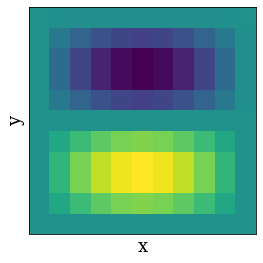

In [10]:
fig,ax = plt.subplots(1,1,figsize=[4,4])
plot_data = ax.pcolor(u_a.T)#,shading='auto')
#cbar = fig.colorbar(plot_data)
#cbar.set_label('u')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xticks([])
ax.set_yticks([])
#ax.set_title('Analytic')
fig.tight_layout()
fig.savefig('ana_feat.png',dpi=150)